<a href="https://colab.research.google.com/github/u-masao/vector-search-tutorial-for-japanese/blob/main/Session01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 日本語テキストのためのベクトル検索、ハンズオン

## 準備

In [1]:
!pip install -q japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## ベクトル、内積、類似度

In [3]:
# アイテムベクトルを定義
item_vectors={}
item_vectors[10]=np.array([1,2])
item_vectors[20]=np.array([-2,-2])
item_vectors[30]=np.array([1,-2])
print(item_vectors)

{10: array([1, 2]), 20: array([-2, -2]), 30: array([ 1, -2])}


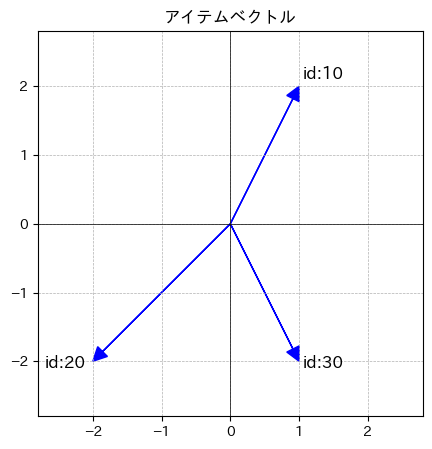

In [4]:
# @title アイテムベクトルの可視化

# ベクトル描画関数
def draw_vector(vec, name, head_length=0.2, color='blue', margin_ratio = 0.05):
    vector_length = np.linalg.norm(vec, ord=2)
    head_ratio = head_length / vector_length
    body_ratio = 1 - head_ratio
    ax.arrow(0, 0, vec[0]*body_ratio, vec[1]*body_ratio, head_width=head_length, head_length=head_length, fc=color, ec=color)
    ax.text(vec[0]*(margin_ratio + 1), vec[1]*(margin_ratio + 1), name, fontsize=12, ha='right' if vec[0]<0 else 'left')

view_range = 2.8

# 描画の設定
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-view_range, view_range)
ax.set_ylim(-view_range, view_range)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('アイテムベクトル')

# ベクトルをプロット
for id, vec in item_vectors.items():
    draw_vector(vec, f"id:{id}")

fig.show()

In [5]:
# クエリベクトルを定義
query_vector=np.array([2,1])
print(query_vector)

[2 1]


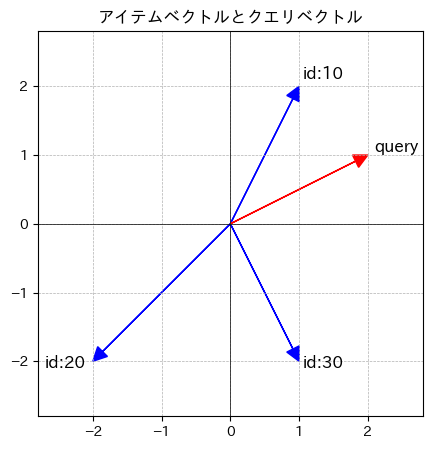

In [6]:
# @title アイテムベクトルとクエリベクトルを可視化
view_range = 2.8

# 描画の設定
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-view_range, view_range)
ax.set_ylim(-view_range, view_range)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('アイテムベクトルとクエリベクトル')

# ベクトルをプロット
for id, vec in item_vectors.items():
    draw_vector(vec, f"id:{id}")

draw_vector(query_vector, 'query', color='red')
fig.show()

## ベクトル間のコサイン



コサインの計算式は次のように表されます：

$$
\cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{\|\vec{a}\| \|\vec{b}\|}
$$

ここで、ベクトル $\vec{a} = (a_x, a_y)$ と $\vec{b} = (b_x, b_y)$ の内積は、

$$
\vec{a} \cdot \vec{b} = a_x b_x + a_y b_y
$$

そして、ベクトルの大きさはそれぞれ、

$$
\|\vec{a}\| = \sqrt{a_x^2 + a_y^2}, \quad \|\vec{b}\| = \sqrt{b_x^2 + b_y^2}
$$

これにより、コサインの具体的な計算式は以下のようになります：

$$
\cos(\theta) = \frac{a_x b_x + a_y b_y}{\sqrt{a_x^2 + a_y^2} \sqrt{b_x^2 + b_y^2}}
$$

In [7]:
# ベクトルを正規化(ノーマライズ)する関数を定義
def normalize(vector):

    # ベクトルの大きさを計算
    vector_length = np.sqrt(vector[0] * vector[0] + vector[1] * vector[1])

    # 大きさを 1 にする
    return vector / vector_length


# 2 次元の内積を計算する関数を定義
def dot_product(vec_a, vec_b):
    return vec_a[0] * vec_b[0] + vec_a[1] * vec_b[1]


# コサインを計算する関数を定義
def calc_cosine(vec_a, vec_b):

    # ベクトルを正規化
    normalized_a = normalize(vec_a)
    normalized_b = normalize(vec_b)

    # 内積を計算
    return dot_product(normalized_a, normalized_b)


# Dict の値でソートする関数を定義
def sort_by_value_desc(scores):
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)

In [8]:
# 類似度を保持する Dict を初期化
similarities = {}

# 各 Item ベクトルとクエリベクトルのコサインを計算
for id, item_vector in item_vectors.items():

    # 内積を計算(コサイン類似度)
    similarities[id] = calc_cosine(item_vector ,query_vector)

# 類似度(降順)でソート
sorted_similarities = sort_by_value_desc(similarities)

# 結果を表示
_ = [print(f"id:{id}, similarity:{sim:.3f}") for id, sim in sorted_similarities]

id:10, similarity:0.800
id:30, similarity:0.000
id:20, similarity:-0.949


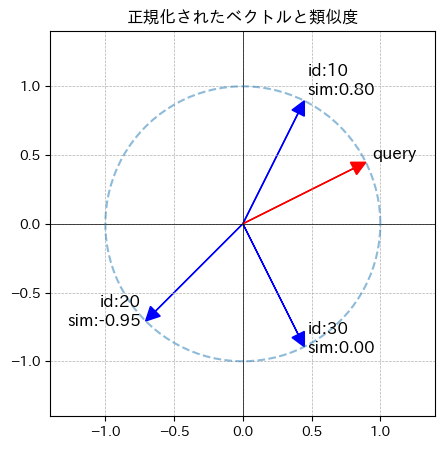

In [9]:
# @title アイテムベクトルとクエリベクトルと類似度の可視化
view_range = 1.4

# 描画の設定
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-view_range, view_range)
ax.set_ylim(-view_range, view_range)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('正規化されたベクトルと類似度')

# ベクトルをプロット
for id, vec in item_vectors.items():

    # アイテムベクトルをプロット
    draw_vector(normalize(vec), f"id:{id}\nsim:{similarities[id]:.2f}", head_length=0.1)

# クエリベクトルをプロット
draw_vector(normalize(query_vector), 'query', color='red', head_length=0.1)

# 単位円を描画
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), linestyle='dashed', alpha=0.5)

# 出力
fig.show()

## まとめ

このセッションでは以下を確認しました。

- アイテムベクトルの数値的表現と幾何的表現
- クエリベクトルの数値的表現と幾何的表現
- ベクトル間のコサインの計算方法
  - 正規化(ノーマライズ)による長さの変換
  - 内積によるコサインの計算
- ソートによる類似アイテムの獲得